In [4]:
import os
import time
import sounddevice as sd
import soundfile as sf
import queue
import sys
import numpy as np

In [2]:
def get_real_time_audio():
    fs = 16000          # 16 Khz for all
    channels = 1        # mono
    duration = 4
    filename = "myfile.wav"
    print("Please Record your voice !!")
    myrec = sd.rec(int(duration * fs), samplerate=fs, channels=channels)
    sd.wait()
    sf.write(filename, myrec, samplerate=fs)
    # play_rec = sd.playrec(myrec, fs, channels=2)
    # sd.wait()
    return filename

In [3]:
get_real_time_audio()

In [13]:
import librosa
from pydub import AudioSegment
import matplotlib.pyplot as plt
from IPython.lib.display import Audio

In [1]:
def get_samples(audio_file_path, sr=False):
    """
    Get audio samples as numpy array
    :param audio_file_path: Audio file path
    :param sr: If sampling rate is required
    :return: Audio samples as numpy array and sampling rate
    """
    audio = AudioSegment.from_wav(audio_file_path)
    if sr:
        return np.array(audio.get_array_of_samples(), dtype=float), audio.frame_rate
    return np.array(audio.get_array_of_samples(), dtype=float)

In [2]:
def resample(y, sr, tgt_sr):
    """
    Resample audio signal
    :param y: Audio signal
    :param sr: Original sampling rate
    :param tgt_sr: Target sampling rate
    :return: Sample audio signal
    """
    if sr != tgt_sr:
        y = librosa.core.resample(y=y, orig_sr=sr, target_sr=tgt_sr)
    return y, tgt_sr

In [11]:
def display_audio(y=None, sr=None, audio_file_path=None):
    """
    Audio display in Ipython
    :param y: Audio signal
    :param sr: Sampling rate
    :param audio_file_path: Audio file path
    :return: Audio display object to display in Ipython
    """
    if audio_file_path:
        audio = AudioSegment.from_wav(file=audio_file_path)
        return Audio(data=np.array(audio.get_array_of_samples(), dtype=float), rate=audio.frame_rate)
    else:
        return Audio(data=y, rate=sr)

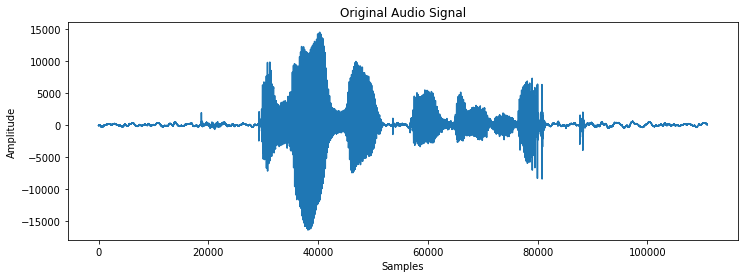

In [14]:
y, sr = get_samples(audio_file_path="/home/jugs/Desktop/p257_433.wav", sr=True)
plt.figure(figsize=(12, 4))
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title("Original Audio Signal")
plt.plot(y)
plt.show()
display_audio(y=y, sr=sr, audio_file_path="/home/jugs/Desktop/p257_433.wav")